In [27]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [28]:
data=pd.read_csv("income.csv")

In [29]:
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [30]:
data.columns

Index(['Name', 'Age', 'Income($)'], dtype='object')

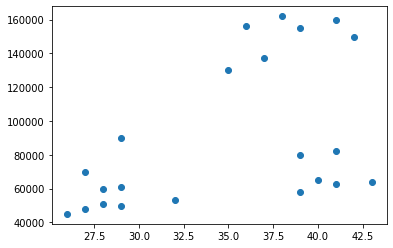

In [31]:
plt.scatter(data['Age'],data['Income($)'])

In [49]:
#Number of clusters form it means how many group yiu want to create
KM = KMeans(n_clusters=3)
y_predict = KM.fit_predict(data[['Age','Income($)']])
y_predict

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [50]:
#add column 'Cluster' having values of y_predict in given dataframe
data['Cluster']=y_predicted

In [34]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

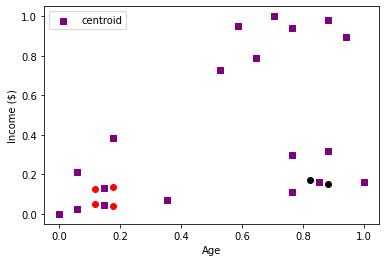

In [48]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]
plt.scatter(data1.Age,data1['Income($)'],color='green')
plt.scatter(data2.Age,data2['Income($)'],color='red')
plt.scatter(data3.Age,data3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='s',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [37]:
scaler = MinMaxScaler()

scaler.fit(data[['Income($)']])
data['Income($)'] = scaler.transform(data[['Income($)']])

scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])

In [38]:
km = KMeans(n_clusters=3)

y_predicted = km.fit_predict(data[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [51]:
data['cluster']=y_predicted

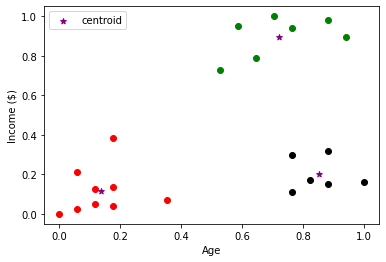

In [40]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]
plt.scatter(data1.Age,data1['Income($)'],color='green')
plt.scatter(data2.Age,data2['Income($)'],color='red')
plt.scatter(data3.Age,data3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [43]:
sse = []
k_rng = range(1,20)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Age','Income($)']])
    sse.append(km.inertia_)

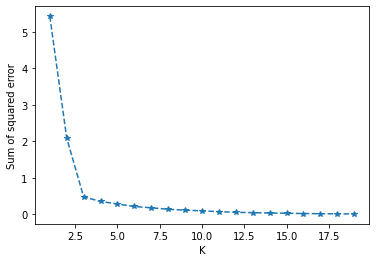

In [44]:

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse,'*--')